30500
max words: 23291


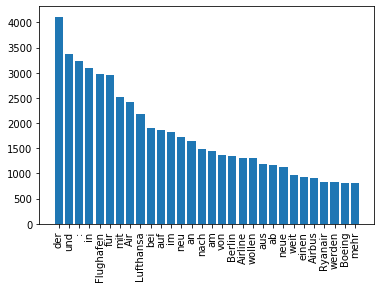

In [3]:
import ktrain
from ktrain import text
import pandas as pd
import random
import numpy as np
import math
import spacy
import matplotlib.pyplot as plt
import seaborn as sn
from nltk.stem import PorterStemmer
import collections

# csv_file = '../../data/merged_ktrain_google_en.csv'
csv_file = '../../data/merged_ktrain_four.csv'

data = pd.read_csv(csv_file).values
texts = [element[0] for element in data]
labels = [element[1:] for element in data]
print(len(data))

# preprocess text
nlp = spacy.load('de_core_news_sm')
stemmer = PorterStemmer()
stoplist = ['der', 'und', ':', '»', '«']

def test_token(text):
    doc = nlp(text)
    output = []
    for t in doc:
        print(f'token: {t.text} - lemma: {t.lemma_} - POS Tag: {t.pos_} - stem: {stemmer.stem(t.text)}')
        output.append(t.lemma_)
    return output


def lemmatize(texts):
    lemmatized_texts = []
    for document in list(nlp.pipe(texts, disable=['tagger', 'parser', 'ner'])):
        current_text = []
        for token in document:
            current_text.append(token.lemma_)
        lemmatized_texts.append(' '.join(current_text))
    return lemmatized_texts


texts = lemmatize(texts)


def count_plot_words(texts):
    wordlist = []
    for text in texts:
        wordlist.extend(text.split(' '))
    counter = collections.Counter(wordlist)
    ddict = {k: v for k, v in sorted(counter.items(), key=lambda item: item[1], reverse=True)}
    values = list(ddict.values())
    print('max words:', len(ddict))

    plt.bar(list(ddict.keys())[:30], values[:30])
    plt.xticks(rotation=90)
    plt.show()

count_plot_words(texts)

[([1], [4]), ([2], [5]), ([3], [6])]